<a href="https://colab.research.google.com/github/liisareet/working-files/blob/main/TV_to_FIX_cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd

file_path = '/content/TV_TO_FIX_final.csv'

df = pd.read_csv(file_path)

df.head()

,Cust Host Id,fix_contract_start_dt,tv_contract_start_dt,days_difference
0,518918,01.12.2024,20.12.2023,206.0
1,522623,01.10.2024,20.12.2023,115.0
2,541529,01.11.2024,20.12.2023,51.0
3,543791,01.10.2024,20.12.2023,222.0
4,550382,01.10.2024,20.12.2023,79.0


In [3]:
total_TV_customers = df['tv_contract_start_dt'].notnull().sum()

fix_customers = df['fix_contract_start_dt'].notnull().sum()

conversion_percentage = (fix_customers / total_TV_customers) * 100

print(f"Total TV Customers: {total_TV_customers}")
print(f"Total FIX Customers: {fix_customers}")
print(f"Conversion Percentage: {conversion_percentage:.2f}%")

Total TV Customers: 456616
Total FIX Customers: 342316
Conversion Percentage: 74.97%


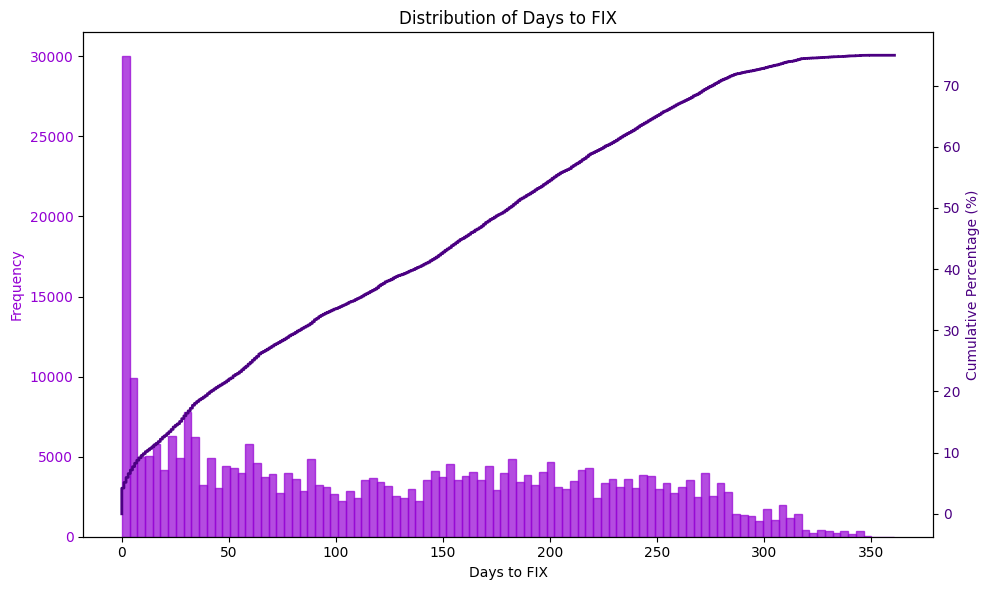

In [4]:
import matplotlib.pyplot as plt
import numpy as np

total_customers = len(df)

df_converted = df[df['days_difference'].notnull()]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(
    df_converted['days_difference'],
    bins=100,
    edgecolor='darkviolet',
    alpha=0.7,
    color='darkviolet'
)

ax1.set_title('Distribution of Days to FIX')
ax1.set_xlabel('Days to FIX')
ax1.set_ylabel('Frequency', color='darkviolet')
ax1.tick_params(axis='y', labelcolor='darkviolet')

ax2 = ax1.twinx()

sorted_days_converted = np.sort(df_converted['days_difference'])
cumulative_percentage_all = (
    np.arange(1, len(sorted_days_converted) + 1) / total_customers * 100
)

ax2.plot(
    sorted_days_converted,
    cumulative_percentage_all,
    color='indigo',
    linewidth=2,
    label='Cumulative Percentage (All Customers)'
)

ax2.set_ylabel('Cumulative Percentage (%)', color='indigo')
ax2.tick_params(axis='y', labelcolor='indigo')

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

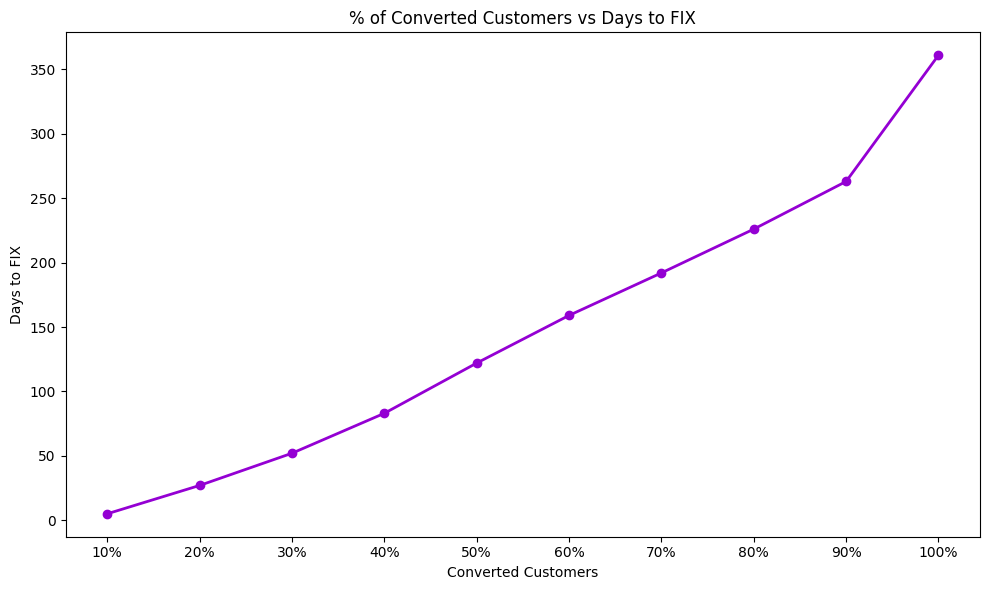

In [5]:
percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
percentile_values = df[df['days_difference'].notnull()]['days_difference'].quantile(percentiles)


plt.figure(figsize=(10, 6))
plt.plot(percentiles, percentile_values, marker='o', color='darkviolet', linestyle='-', linewidth=2)

plt.title('% of Converted Customers vs Days to FIX')
plt.xlabel('Converted Customers')
plt.ylabel('Days to FIX')
plt.xticks(percentiles, labels=[f"{int(p*100)}%" for p in percentiles])
plt.grid(False)

plt.tight_layout()
plt.show()

In [7]:
converted_df = df.dropna(subset=['fix_contract_start_dt'])

converted_df_sorted = converted_df.sort_values(by='days_difference')

percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60,0.70, 0.80, 0.90, 1.0]
percentile_values = converted_df_sorted['days_difference'].quantile(percentiles)

percentile_diff = percentile_values.diff().fillna(0)

percentile_table_10 = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'Days Difference': percentile_values.values,
    'Difference from Previous Percentile': percentile_diff.values
})

percentile_table_10

,Percentile,Days Difference,Difference from Previous Percentile
0,10%,5.0,0.0
1,20%,27.0,22.0
2,30%,52.0,25.0
3,40%,83.0,31.0
4,50%,122.0,39.0
5,60%,159.0,37.0
6,70%,192.0,33.0
7,80%,226.0,34.0
8,90%,263.0,37.0
9,100%,361.0,98.0


In [8]:
converted_df = df.dropna(subset=['fix_contract_start_dt'])

converted_df_sorted = converted_df.sort_values(by='days_difference')

percentiles = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.0]
percentile_values = converted_df_sorted['days_difference'].quantile(percentiles)

percentile_diff = percentile_values.diff().fillna(0)

percentile_table = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentiles],
    'Days Difference': percentile_values.values,
    'Difference from Previous Percentile': percentile_diff.values
})

percentile_table

,Percentile,Days Difference,Difference from Previous Percentile
0,5%,0.0,0.0
1,10%,5.0,5.0
2,15%,15.0,10.0
3,20%,27.0,12.0
4,25%,37.0,10.0
5,30%,52.0,15.0
6,35%,65.0,13.0
7,40%,83.0,18.0
8,45%,102.0,19.0
9,50%,122.0,20.0
